# ML for Reservation Data & Correlation with Houston Census Figures

import pandas as pd
import numpy as np
import xlrd
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
import warnings
warnings.simplefilter('ignore')

# %matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

In [52]:
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Reading in Census Data

In [53]:
Census_Data = pd.read_csv('censuses.csv', index_col=None)
Census_Data.head(5)

,line_number,house_number,street_name,last_name,given_name,relation,color_race,sex,age_at_last_birthday,occupation,own_or_rent,owned_free_or_mortgage,house_or_farm,my_notes,file_name,census_year,grouped_occu
0,65,830,Arthur St,Brown,Eliza,Boarder,B,F,26,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
1,63,830,Arthur St,Butcher,John H.,Boarder,B,M,27,Drayman,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
2,61,830,Arthur St,Olliver,Marsha,Head,B,F,25,Laundress,Rent,Null,House,Null,1900 census ED 70 page 2,1900,Unskilled
3,64,830,Arthur St,Spivey,Neata,Boarder,B,F,25,Servant,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Unskilled
4,62,830,Arthur St,Wells,Ethel,Daughter,B,F,8,At School,Null,Null,Null,Null,1900 census ED 70 page 2,1900,Student


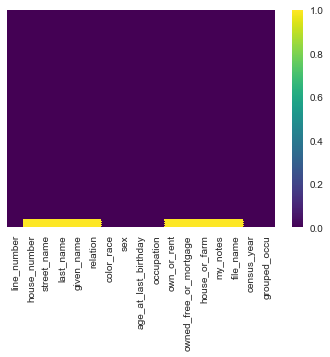

In [54]:
sns.heatmap(Census_Data.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [55]:
Census_Data.isnull().any()

line_number               False
house_number               True
street_name                True
last_name                  True
given_name                 True
relation                   True
color_race                False
sex                       False
age_at_last_birthday      False
occupation                False
own_or_rent                True
owned_free_or_mortgage     True
house_or_farm              True
my_notes                   True
file_name                  True
census_year               False
grouped_occu              False
dtype: bool

In [56]:
Census_Data.columns

Index(['line_number', 'house_number', 'street_name', 'last_name', 'given_name',
       'relation', 'color_race', 'sex', 'age_at_last_birthday', 'occupation',
       'own_or_rent', 'owned_free_or_mortgage', 'house_or_farm', 'my_notes',
       'file_name', 'census_year', 'grouped_occu'],
      dtype='object')

In [57]:
Census_Data = Census_Data[['color_race', 'sex', 'age_at_last_birthday', 'occupation',
       'census_year', 'grouped_occu']]

In [58]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
dtype: bool

## Clean the Age Column

In [59]:
Census_Data['age_at_last_birthday'].unique()

array(['26', '27', '25', '8', '46', '34', '19', '15', '12', '9', '21',
       '5', '0', '2', '58', '35', '23', '18', '13', '56', '41', '20',
       '39', '7', '24', '51', '43', '17', '14', '60', '22', '54', '48',
       '10', '28', '30', '11', '32', '31', '29', '50', '49', '1', '63',
       '33', '6', '64', '3', '37', '55', '36', '57', '53', '16', '87',
       '81', '38', '4', '65', '45', '40', '76', '47', '44', '75', '42',
       '52', '61', '68', '69', '77', '105', '59', '62', 'Null', '84',
       '80', '5 and 0 months', '2 months', '2 and 3 month',
       '5 and 1 month', '3 and 10 months', '11 months', '70', 'un - (80)',
       '3 and 11 months', '9 months', '2 and 11 months', '5 months',
       '5 and 11 months', '67', '4 and 0 months', 'Un.', '6 and 1 month',
       '4 and 1 month', '2 and 6 months', '4 and 10 months',
       '1 and 4 months', '1 month', '2 and 5 months', '8 months', '73',
       '10 months', '2 and 10 months', '1 and 9 months', '4 months',
       '2 and 3 months

In [60]:
def age_clean(data,under_1_value = 1, pandas = 'yes'):
    clean_age = []
    if pandas == 'yes':
        data_lst = data.tolist()
    else:
        data_lst = data
    for datum in data_lst:
        if 'month' in str(datum):
            if 'and' in str(datum):
                clean_age.append(str(datum).split(' ')[0])
            else:
                clean_age.append(str(under_1_value))
        else:
            clean_age.append(datum)
    return clean_age

In [61]:
dirty_age = Census_Data['age_at_last_birthday']
#dirty_age
clean_age = age_clean(dirty_age,under_1_value = 1, pandas = 'yes')

In [62]:
Census_Data['Age'] = clean_age

In [63]:
Census_Data=Census_Data.dropna()
Census_Data['Age'].unique()

array(['26', '27', '25', '8', '46', '34', '19', '15', '12', '9', '21',
       '5', '0', '2', '58', '35', '23', '18', '13', '56', '41', '20',
       '39', '7', '24', '51', '43', '17', '14', '60', '22', '54', '48',
       '10', '28', '30', '11', '32', '31', '29', '50', '49', '1', '63',
       '33', '6', '64', '3', '37', '55', '36', '57', '53', '16', '87',
       '81', '38', '4', '65', '45', '40', '76', '47', '44', '75', '42',
       '52', '61', '68', '69', '77', '105', '59', '62', 'Null', '84',
       '80', '70', 'un - (80)', '67', 'Un.', '73', '71', '66', '90', '85',
       '72', '92', '82', '83', '100', '78', '74', '79'], dtype=object)

In [64]:
Census_Data.shape

(4244, 7)

In [65]:
print(Census_Data[Census_Data.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [color_race, sex, age_at_last_birthday, occupation, census_year, grouped_occu, Age]
Index: []


In [66]:
Census_Data['Age'] = pd.to_numeric(Census_Data['Age'], errors='coerce')

In [67]:
Census_Data['Age'].unique()

array([ 26.,  27.,  25.,   8.,  46.,  34.,  19.,  15.,  12.,   9.,  21.,
         5.,   0.,   2.,  58.,  35.,  23.,  18.,  13.,  56.,  41.,  20.,
        39.,   7.,  24.,  51.,  43.,  17.,  14.,  60.,  22.,  54.,  48.,
        10.,  28.,  30.,  11.,  32.,  31.,  29.,  50.,  49.,   1.,  63.,
        33.,   6.,  64.,   3.,  37.,  55.,  36.,  57.,  53.,  16.,  87.,
        81.,  38.,   4.,  65.,  45.,  40.,  76.,  47.,  44.,  75.,  42.,
        52.,  61.,  68.,  69.,  77., 105.,  59.,  62.,  nan,  84.,  80.,
        70.,  67.,  73.,  71.,  66.,  90.,  85.,  72.,  92.,  82.,  83.,
       100.,  78.,  74.,  79.])

In [68]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
Age                      True
dtype: bool

In [69]:
Census_Data=Census_Data.dropna()

In [70]:
Census_Data.isnull().any()

color_race              False
sex                     False
age_at_last_birthday    False
occupation              False
census_year             False
grouped_occu            False
Age                     False
dtype: bool

In [71]:
Census_Data.shape

(4240, 7)

## Reduce the Race columns to B and W

In [72]:
Census_Data['color_race'].unique()

array(['B', 'W', 'Mu', 'M', 'M/W', 'My', 'Jp'], dtype=object)

In [73]:
Census_Data['color_race'].replace(['Mu', 'M', 'M/W', 'My'], "B", inplace=True)

In [74]:
Census_Data['color_race'].unique()

array(['B', 'W', 'Jp'], dtype=object)

In [75]:
Census_Data = Census_Data[Census_Data.color_race != 'Jp']
Census_Data['color_race'].unique()

array(['B', 'W'], dtype=object)

## Clean the Gender column to ensure M and F only

In [76]:
Census_Data['sex'].unique()

array(['F', 'M', 'FM'], dtype=object)

In [77]:
Census_Data = Census_Data[Census_Data.sex != 'FM']
Census_Data['sex'].unique()

array(['F', 'M'], dtype=object)

In [78]:
Census_Data['census_year'].unique()

array([1900, 1920, 1910], dtype=int64)

In [79]:
Census_Data['grouped_occu'].unique()

array(['Unskilled', 'Student', 'Missing Occupations', 'Skilled Labor',
       'Skilled Professionals'], dtype=object)

In [80]:
Census_Data.shape

(4236, 7)

In [81]:
Census_Data.rename(columns={'color_race': 'Race', 'sex': 'Sex', 'census_year':'Year',
                           'grouped_occu':'Occ'}, inplace=True)

In [82]:
Census_Data.head(10)

,Race,Sex,age_at_last_birthday,occupation,Year,Occ,Age
0,B,F,26,Servant,1900,Unskilled,26.0
1,B,M,27,Drayman,1900,Unskilled,27.0
2,B,F,25,Laundress,1900,Unskilled,25.0
3,B,F,25,Servant,1900,Unskilled,25.0
4,B,F,8,At School,1900,Student,8.0
5,B,M,46,Day Laborer,1900,Unskilled,46.0
6,B,F,34,Null,1900,Missing Occupations,34.0
7,B,M,19,Drayman,1900,Unskilled,19.0
8,B,F,15,Null,1900,Missing Occupations,15.0
9,B,M,12,At School,1900,Student,12.0


In [83]:
del Census_Data['age_at_last_birthday']
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,26.0
1,B,M,Drayman,1900,Unskilled,27.0
2,B,F,Laundress,1900,Unskilled,25.0
3,B,F,Servant,1900,Unskilled,25.0
4,B,F,At School,1900,Student,8.0


In [84]:
Census_Data.shape

(4236, 6)

## IF AGE <=14 AND OCC ="MISSING OCCUPATIONS" THEN OCC = 'STUDENT'

In [85]:
Census_Data.loc[ (Census_Data.Age <= 14) & (Census_Data.Occ =='Missing Occupations'),'Occ'] = 'Student'

In [86]:
Census_Data.shape

(4236, 6)

## Remove 'Missing Occupations'

In [87]:
Census_Data = Census_Data[Census_Data.Occ != 'Missing Occupations']

In [88]:
Census_Data.shape

(3625, 6)

In [89]:
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,26.0
1,B,M,Drayman,1900,Unskilled,27.0
2,B,F,Laundress,1900,Unskilled,25.0
3,B,F,Servant,1900,Unskilled,25.0
4,B,F,At School,1900,Student,8.0


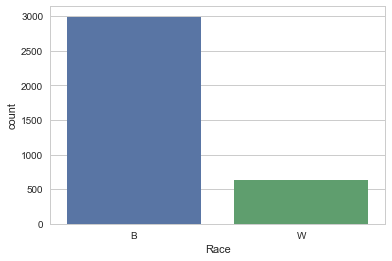

In [90]:
sns.countplot(x = 'Race',data=Census_Data)
plt.show()

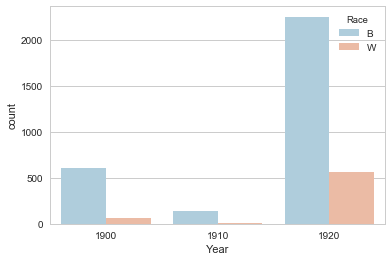

In [91]:
sns.countplot(x='Year',hue='Race',data=Census_Data,palette='RdBu_r')

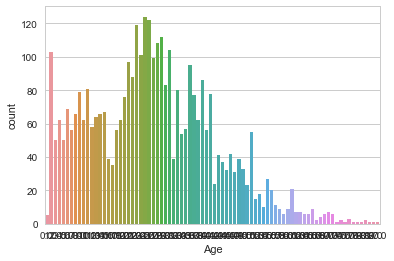

In [92]:
sns.countplot(x = 'Age',data=Census_Data)
plt.show()



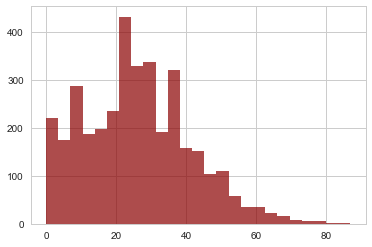

In [93]:
Census_Data['Age'].hist(bins=25,color='darkred',alpha=0.7)

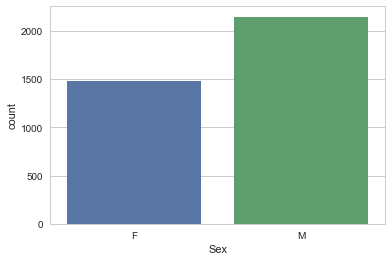

In [94]:
sns.countplot(x = 'Sex',data=Census_Data)
plt.show()

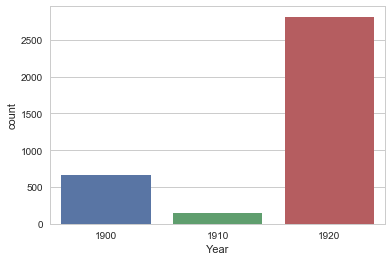

In [95]:
sns.countplot(x = 'Year',data=Census_Data)
plt.show()

## Group the Age column into Age Groups

In [96]:
age_ranges= [0,15,55,110]
age_labels = ['0-15','16-55','Above-56']
Census_Data['Age'] = pd.cut(Census_Data['Age'], bins=age_ranges, labels=age_labels)

In [97]:
Census_Data.head(5)

,Race,Sex,occupation,Year,Occ,Age
0,B,F,Servant,1900,Unskilled,16-55
1,B,M,Drayman,1900,Unskilled,16-55
2,B,F,Laundress,1900,Unskilled,16-55
3,B,F,Servant,1900,Unskilled,16-55
4,B,F,At School,1900,Student,0-15


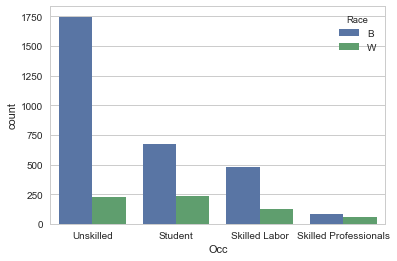

In [98]:
sns.countplot(x='Occ',hue='Race',data=Census_Data) #,palette='RdBu_r')

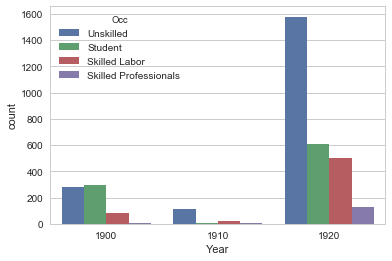

In [99]:
sns.countplot(x='Year',hue='Occ',data=Census_Data)

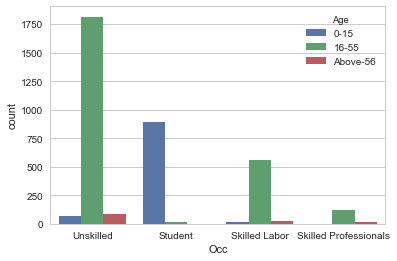

In [100]:
sns.countplot(x = 'Occ',hue='Age',data=Census_Data)
plt.show()

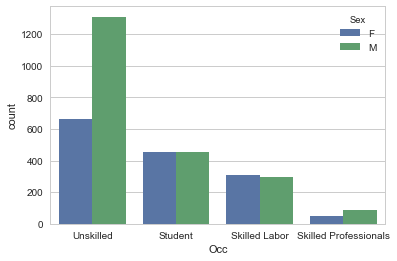

In [102]:
sns.countplot(x = 'Occ',hue='Sex',data=Census_Data)
plt.show()

## Hot encode the Race, Sex, Year and Age columns

In [103]:
data2 = pd.get_dummies(Census_Data, columns =['Race','Sex', 'Year','Age'])
data2.columns

Index(['occupation', 'Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900',
       'Year_1910', 'Year_1920', 'Age_0-15', 'Age_16-55', 'Age_Above-56'],
      dtype='object')

In [104]:
data2.head()

,occupation,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56
0,Servant,Unskilled,1,0,1,0,1,0,0,0,1,0
1,Drayman,Unskilled,1,0,0,1,1,0,0,0,1,0
2,Laundress,Unskilled,1,0,1,0,1,0,0,0,1,0
3,Servant,Unskilled,1,0,1,0,1,0,0,0,1,0
4,At School,Student,1,0,1,0,1,0,0,1,0,0


In [105]:
del data2['occupation']
data2 = data2.apply(pd.to_numeric, errors='ignore')
data2.dtypes

Occ             object
Race_B           uint8
Race_W           uint8
Sex_F            uint8
Sex_M            uint8
Year_1900        uint8
Year_1910        uint8
Year_1920        uint8
Age_0-15         uint8
Age_16-55        uint8
Age_Above-56     uint8
dtype: object

In [106]:
data2.shape

(3625, 11)

## data2 dataframe

In [107]:
data2.head()

,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56
0,Unskilled,1,0,1,0,1,0,0,0,1,0
1,Unskilled,1,0,0,1,1,0,0,0,1,0
2,Unskilled,1,0,1,0,1,0,0,0,1,0
3,Unskilled,1,0,1,0,1,0,0,0,1,0
4,Student,1,0,1,0,1,0,0,1,0,0


In [108]:
data3 = data2.copy()
data3['Occ'][data3['Occ']=='Unskilled']=0
data3['Occ'][data3['Occ']=='Skilled Labor']=1
data3['Occ'][data3['Occ']=='Skilled Professionals']=2
data3['Occ'][data3['Occ']=='Student']=3

## data3 dataframe has Occ coded with 0,1,2,3:
[data3['Occ']=='Unskilled']=0
[data3['Occ']=='Skilled Labor']=1
[data3['Occ']=='Skilled Professionals']=2
[data3['Occ']=='Student']=3

In [109]:
data3.head()

,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56
0,0,1,0,1,0,1,0,0,0,1,0
1,0,1,0,0,1,1,0,0,0,1,0
2,0,1,0,1,0,1,0,0,0,1,0
3,0,1,0,1,0,1,0,0,0,1,0
4,3,1,0,1,0,1,0,0,1,0,0


In [110]:
data3.corr()

,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56
Race_B,1.000000,-1.000000,0.089266,-0.089266,0.103793,0.050228,-0.120083,-0.117005,0.111155,-0.000063
Race_W,-1.000000,1.000000,-0.089266,0.089266,-0.103793,-0.050228,0.120083,0.117005,-0.111155,0.000063
Sex_F,0.089266,-0.089266,1.000000,-1.000000,0.021048,0.001233,-0.020124,0.082898,-0.054751,-0.058491
Sex_M,-0.089266,0.089266,-1.000000,1.000000,-0.021048,-0.001233,0.020124,-0.082898,0.054751,0.058491
Year_1900,0.103793,-0.103793,0.021048,-0.021048,1.000000,-0.096920,-0.882686,0.183999,-0.181774,-0.003668
Year_1910,0.050228,-0.050228,0.001233,-0.001233,-0.096920,1.000000,-0.382201,-0.098659,0.084141,0.027996
Year_1920,-0.120083,0.120083,-0.020124,0.020124,-0.882686,-0.382201,1.000000,-0.124249,0.129038,-0.009813
Age_0-15,-0.117005,0.117005,0.082898,-0.082898,0.183999,-0.098659,-0.124249,1.000000,-0.912297,-0.117203
Age_16-55,0.111155,-0.111155,-0.054751,0.054751,-0.181774,0.084141,0.129038,-0.912297,1.000000,-0.291841
Age_Above-56,-0.000063,0.000063,-0.058491,0.058491,-0.003668,0.027996,-0.009813,-0.117203,-0.291841,1.000000


## data4 dataframe has hot encoded Occ with 1 and 0's in seperate columns

In [111]:
data4 = pd.get_dummies(data3, columns =['Occ'])

In [112]:
data4.columns

Index(['Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_0-15', 'Age_16-55', 'Age_Above-56', 'Occ_0', 'Occ_1',
       'Occ_2', 'Occ_3'],
      dtype='object')

In [113]:
data4.head()

,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56,Occ_0,Occ_1,Occ_2,Occ_3
0,1,0,1,0,1,0,0,0,1,0,1,0,0,0
1,1,0,0,1,1,0,0,0,1,0,1,0,0,0
2,1,0,1,0,1,0,0,0,1,0,1,0,0,0
3,1,0,1,0,1,0,0,0,1,0,1,0,0,0
4,1,0,1,0,1,0,0,1,0,0,0,0,0,1


In [114]:
data4.corr(method='spearman')

,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56,Occ_0,Occ_1,Occ_2,Occ_3
Race_B,1.000000,-1.000000,0.089266,-0.089266,0.103793,0.050228,-0.120083,-0.117005,0.111155,-0.000063,0.177371,-0.032419,-0.123178,-0.121342
Race_W,-1.000000,1.000000,-0.089266,0.089266,-0.103793,-0.050228,0.120083,0.117005,-0.111155,0.000063,-0.177371,0.032419,0.123178,0.121342
Sex_F,0.089266,-0.089266,1.000000,-1.000000,0.021048,0.001233,-0.020124,0.082898,-0.054751,-0.058491,-0.160214,0.094399,-0.019620,0.111534
Sex_M,-0.089266,0.089266,-1.000000,1.000000,-0.021048,-0.001233,0.020124,-0.082898,0.054751,0.058491,0.160214,-0.094399,0.019620,-0.111534
Year_1900,0.103793,-0.103793,0.021048,-0.021048,1.000000,-0.096920,-0.882686,0.183999,-0.181774,-0.003668,-0.119613,-0.051321,-0.075893,0.215250
Year_1910,0.050228,-0.050228,0.001233,-0.001233,-0.096920,1.000000,-0.382201,-0.098659,0.084141,0.027996,0.103150,-0.016573,-0.011679,-0.099090
Year_1920,-0.120083,0.120083,-0.020124,0.020124,-0.882686,-0.382201,1.000000,-0.124249,0.129038,-0.009813,0.062349,0.055475,0.075977,-0.153060
Age_0-15,-0.117005,0.117005,0.082898,-0.082898,0.183999,-0.098659,-0.124249,1.000000,-0.912297,-0.117203,-0.576988,-0.242815,-0.120867,0.925598
Age_16-55,0.111155,-0.111155,-0.054751,0.054751,-0.181774,0.084141,0.129038,-0.912297,1.000000,-0.291841,0.536729,0.226645,0.085711,-0.849840
Age_Above-56,-0.000063,0.000063,-0.058491,0.058491,-0.003668,0.027996,-0.009813,-0.117203,-0.291841,1.000000,0.052740,0.020205,0.076795,-0.112019


## Filter Using Pearson Correlation

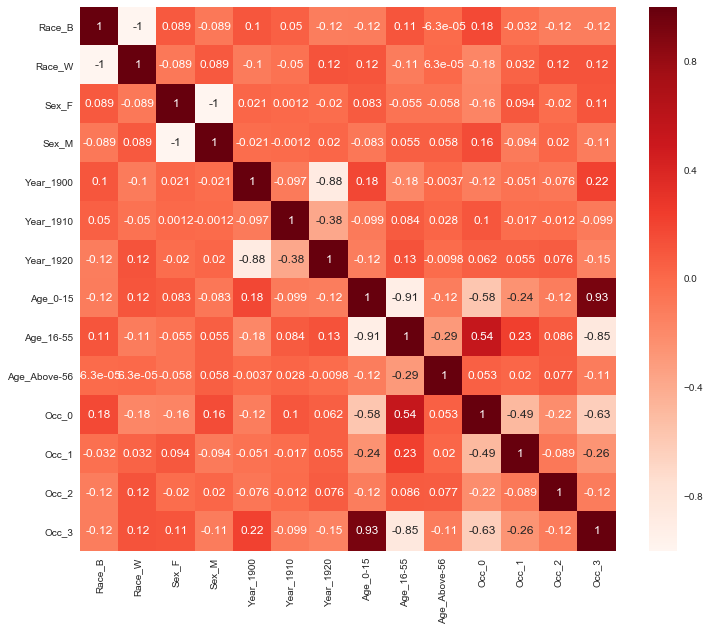

In [159]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = data4.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [160]:
#Correlation with output variable
Occupations = ['Occ_0', 'Occ_1', 'Occ_2','Occ_3']
for i in Occupations:
    cor_target = abs(cor[i])
    #Selecting highly correlated features
    relevant_features = cor_target[cor_target>0.25]
    print(relevant_features)
    print("--------")

Age_0-15     0.576988
Age_16-55    0.536729
Occ_0        1.000000
Occ_1        0.489080
Occ_3        0.631528
Name: Occ_0, dtype: float64
--------
Occ_0    0.489080
Occ_1    1.000000
Occ_3    0.259192
Name: Occ_1, dtype: float64
--------
Occ_2    1.0
Name: Occ_2, dtype: float64
--------
Age_0-15     0.925598
Age_16-55    0.849840
Occ_0        0.631528
Occ_1        0.259192
Occ_3        1.000000
Name: Occ_3, dtype: float64
--------


## Machine learning

In [117]:
#importing libraries
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

## Create train/test split of data using data2 dataframe

In [118]:
train,test = train_test_split(data2,test_size=0.2,random_state=7)

In [119]:
print ("train shape:   ")
print(train.shape)
print ("test shape:    ")
print(test.shape)
print ("Unique classes with count : ")
print(pd.value_counts(train['Occ']))
print ("data description : ")
#print(train.describe())

train shape:   
(2900, 11)
test shape:    
(725, 11)
Unique classes with count : 
Unskilled                1571
Student                   726
Skilled Labor             486
Skilled Professionals     117
Name: Occ, dtype: int64
data description : 


In [120]:
#checking missing values
print (train.info())
#No null values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2900 entries, 1172 to 207
Data columns (total 11 columns):
Occ             2900 non-null object
Race_B          2900 non-null uint8
Race_W          2900 non-null uint8
Sex_F           2900 non-null uint8
Sex_M           2900 non-null uint8
Year_1900       2900 non-null uint8
Year_1910       2900 non-null uint8
Year_1920       2900 non-null uint8
Age_0-15        2900 non-null uint8
Age_16-55       2900 non-null uint8
Age_Above-56    2900 non-null uint8
dtypes: object(1), uint8(10)
memory usage: 73.6+ KB
None


In [121]:
#Modelling
train['Occ'][train['Occ']=='Unskilled']=0
train['Occ'][train['Occ']=='Skilled Labor']=1
train['Occ'][train['Occ']=='Skilled Professionals']=2
train['Occ'][train['Occ']=='Student']=3

test['Occ'][test['Occ']=='Unskilled']=0
test['Occ'][test['Occ']=='Skilled Labor']=1
test['Occ'][test['Occ']=='Skilled Professionals']=2
test['Occ'][test['Occ']=='Student']=3

X = train.iloc[:,1:]
y = train.iloc[:,0]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,0])


In [122]:
# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC()))
# evaluate each model in turn
scoring = 'accuracy'

In [123]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=5)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogisticRegression: 0.766207 (0.021245)
DecisionTreeClassifier: 0.767931 (0.021315)
LinearDiscriminantAnalysis: 0.767931 (0.020807)
KNeighborsClassifier: 0.756897 (0.027163)
GaussianNB: 0.383103 (0.020074)
SVC: 0.766897 (0.019881)


## Warning: Variables are collinear means that the predictors are correlated - Namely M/F and B/W

## Remove one of the Collinear variables - both W and F

In [162]:
data5 = data2.copy()
data5.columns

Index(['Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_0-15', 'Age_16-55', 'Age_Above-56'],
      dtype='object')

In [163]:
columns = ['Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_0-15', 'Age_16-55', 'Age_Above-56']

data5.drop(['Sex_F','Race_W','Year_1920','Age_Above-56'], axis=1, inplace=True)

data5.head(5)

,Occ,Race_B,Sex_M,Year_1900,Year_1910,Age_0-15,Age_16-55
0,Unskilled,1,0,1,0,0,1
1,Unskilled,1,1,1,0,0,1
2,Unskilled,1,0,1,0,0,1
3,Unskilled,1,0,1,0,0,1
4,Student,1,0,1,0,1,0


In [164]:
train,test = train_test_split(data5,test_size=0.2,random_state=7)

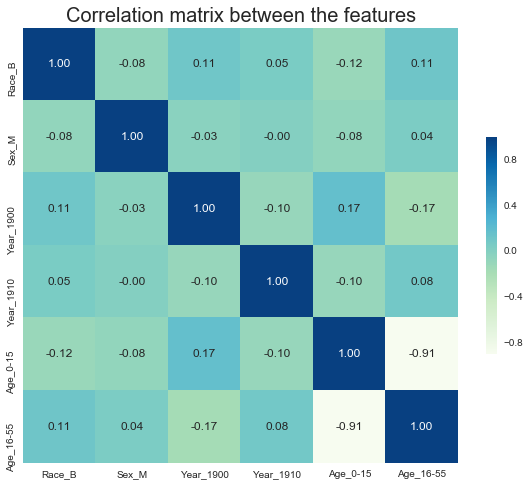

In [165]:
correlation_matrix = train.corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(correlation_matrix, vmax=1, square=True, annot=True,fmt='.2f', cmap ='GnBu', cbar_kws={"shrink": .5}, robust=True)
plt.title('Correlation matrix between the features', fontsize=20)
plt.show()

In [166]:
print ("train shape:   ")
print(train.shape)
print ("test shape:    ")
print(test.shape)
print ("Unique classes with count : ")
print(pd.value_counts(train['Occ']))
print ("data description : ")
#print(train.describe())

train shape:   
(2900, 7)
test shape:    
(725, 7)
Unique classes with count : 
Unskilled                1571
Student                   726
Skilled Labor             486
Skilled Professionals     117
Name: Occ, dtype: int64
data description : 


In [167]:
#Modelling
train['Occ'][train['Occ']=='Unskilled']=0
train['Occ'][train['Occ']=='Skilled Labor']=1
train['Occ'][train['Occ']=='Skilled Professionals']=2
train['Occ'][train['Occ']=='Student']=3

test['Occ'][test['Occ']=='Unskilled']=0
test['Occ'][test['Occ']=='Skilled Labor']=1
test['Occ'][test['Occ']=='Skilled Professionals']=2
test['Occ'][test['Occ']=='Student']=3

X = train.iloc[:,1:]
y = train.iloc[:,0]
y = pd.to_numeric(y)
y_test=pd.to_numeric(test.iloc[:,0])


## Compare the Results for different classifier models

In [168]:
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=15, random_state=7)
	cv_results = model_selection.cross_val_score(model, X,y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LogisticRegression: 0.764133 (0.025946)
DecisionTreeClassifier: 0.765166 (0.025759)
LinearDiscriminantAnalysis: 0.765167 (0.024377)
KNeighborsClassifier: 0.765511 (0.027552)
GaussianNB: 0.379271 (0.039138)
SVC: 0.766891 (0.024052)


In [169]:
# Make predictions on validation dataset
print ("LogisticRegression Performance")
LR = LogisticRegression()
LR.fit(X,y)
predictions = LR.predict(test.iloc[:,1:])
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


LogisticRegression Performance
0.783448275862069
[[387   0   0  13]
 [118   0   0   2]
 [ 22   0   0   0]
 [  2   0   0 181]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       400
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00        22
           3       0.92      0.99      0.96       183

   micro avg       0.78      0.78      0.78       725
   macro avg       0.41      0.49      0.45       725
weighted avg       0.64      0.78      0.70       725



In [170]:
# Make predictions on validation dataset
print ("SVC Performance")
SVM = SVC()
SVM.fit(X,y)
predictions = SVM.predict(test.iloc[:,1:])
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))


SVC Performance
0.783448275862069
[[387   0   0  13]
 [118   0   0   2]
 [ 22   0   0   0]
 [  2   0   0 181]]
              precision    recall  f1-score   support

           0       0.73      0.97      0.83       400
           1       0.00      0.00      0.00       120
           2       0.00      0.00      0.00        22
           3       0.92      0.99      0.96       183

   micro avg       0.78      0.78      0.78       725
   macro avg       0.41      0.49      0.45       725
weighted avg       0.64      0.78      0.70       725



In [171]:
print ("KNN Performance")
KNN = KNeighborsClassifier()
KNN.fit(X,y)
predictions = KNN.predict(test.iloc[:,1:])
print (accuracy_score(y_test, predictions))
print (confusion_matrix(y_test, predictions))
print (classification_report(y_test, predictions))

KNN Performance
0.7448275862068966
[[346  41   0  13]
 [105  13   0   2]
 [ 17   5   0   0]
 [  2   0   0 181]]
              precision    recall  f1-score   support

           0       0.74      0.86      0.80       400
           1       0.22      0.11      0.15       120
           2       0.00      0.00      0.00        22
           3       0.92      0.99      0.96       183

   micro avg       0.74      0.74      0.74       725
   macro avg       0.47      0.49      0.47       725
weighted avg       0.68      0.74      0.70       725



## PCA Projection to 2D

In [322]:
data2.columns

Index(['Occ', 'Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_0-15', 'Age_16-55', 'Age_Above-56'],
      dtype='object')

In [323]:
features = ['Race_B','Race_W', 'Sex_M', 'Year_1900','Year_1920','Age_0-15','Age_16-55']

In [324]:
x = data2.loc[:, features].values

In [325]:
y = data2.loc[:,['Occ']].values

In [326]:
pd.DataFrame(data = x, columns = features).head()

,Race_B,Race_W,Sex_M,Year_1900,Year_1920,Age_0-15,Age_16-55
0,1,0,0,1,0,0,1
1,1,0,1,1,0,0,1
2,1,0,0,1,0,0,1
3,1,0,0,1,0,0,1
4,1,0,0,1,0,1,0


In [327]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [328]:
principalComponents = pca.fit_transform(x)

In [329]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [330]:
principalDf.head(5)

,principal component 1,principal component 2
0,0.086434,-1.060887
1,-0.013208,-0.867206
2,0.086434,-1.060887
3,0.086434,-1.060887
4,1.367202,-0.834175


In [331]:
data2[['Occ']].head()

,Occ
0,Unskilled
1,Unskilled
2,Unskilled
3,Unskilled
4,Student


In [332]:
finalDf = pd.concat([principalDf, data2[['Occ']]], axis = 1)
finalDf.head(5)

,principal component 1,principal component 2,Occ
0,0.086434,-1.060887,Unskilled
1,-0.013208,-0.867206,Unskilled
2,0.086434,-1.060887,Unskilled
3,0.086434,-1.060887,Unskilled
4,1.367202,-0.834175,Student


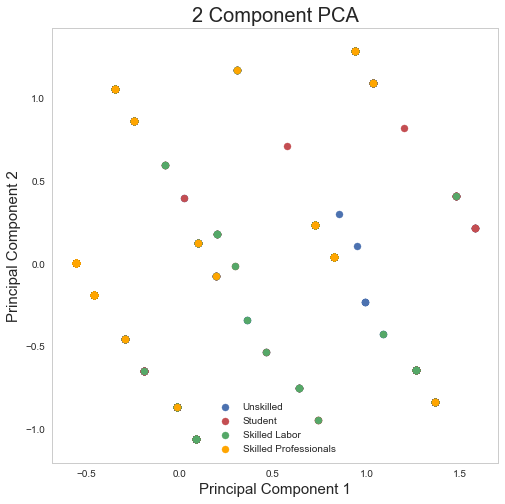

In [333]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)


targets = ['Unskilled', 'Student', 'Skilled Labor','Skilled Professionals']
colors = ['b', 'r','g','orange']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Occ'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [337]:
pca.explained_variance_ratio_

array([3.35232295e-01, 2.63584174e-01, 2.02084789e-01, 1.70335593e-01,
       1.49760451e-02, 1.37871047e-02, 4.74728440e-34])

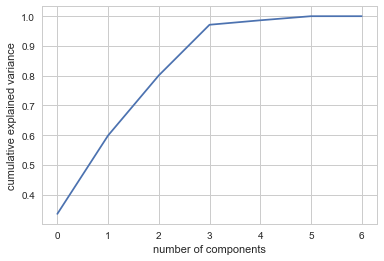

In [336]:
pca = PCA().fit(x)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

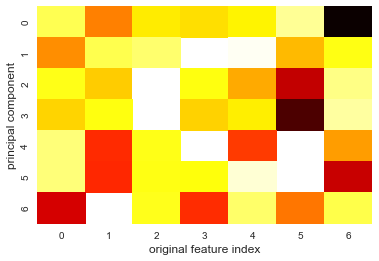

In [319]:
sns.heatmap(np.log(pca.inverse_transform(np.eye(x.shape[1]))), cmap="hot", cbar=False)
plt.ylabel('principal component', fontsize=12);
plt.xlabel('original feature index', fontsize=12);


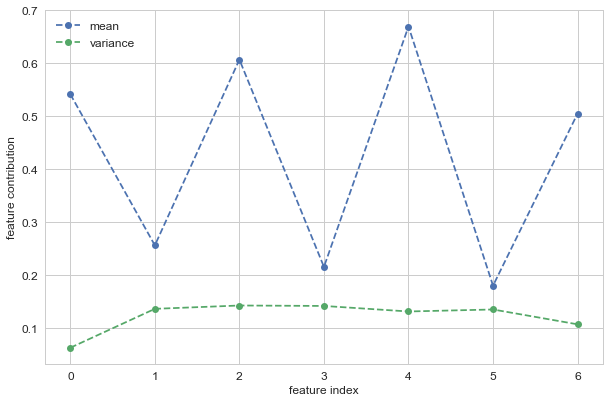

In [320]:
pca_inv_data = pca.inverse_transform(np.eye(x.shape[1]))

fig = plt.figure(figsize=(10, 6.5))
plt.plot(pca_inv_data.mean(axis=0), '--o', label = 'mean')
plt.plot(np.square(pca_inv_data.std(axis=0)), '--o', label = 'variance')
plt.legend(loc='lower right')
plt.ylabel('feature contribution', fontsize=12);
plt.xlabel('feature index', fontsize=12);
plt.tick_params(axis='both', which='major', labelsize=12);
plt.tick_params(axis='both', which='minor', labelsize=12);
#plt.xlim([0, 7])
plt.legend(loc='upper left', fontsize=12)

In [298]:
features

['Race_B', 'Sex_M', 'Year_1900', 'Year_1920', 'Age_0-15', 'Age_16-55']

## Receiver Operating Characteristic (ROC)

Example of Receiver Operating Characteristic (ROC) metric to evaluate classifier output quality.

ROC curves typically feature true positive rate on the Y axis, and false positive rate on the X axis. This means that the top left corner of the plot is the “ideal” point - a false positive rate of zero, and a true positive rate of one. This is not very realistic, but it does mean that a larger area under the curve (AUC) is usually better.

The “steepness” of ROC curves is also important, since it is ideal to maximize the true positive rate while minimizing the false positive rate.

In [222]:
data2.head()

,Occ,Race_B,Race_W,Sex_F,Sex_M,Year_1900,Year_1910,Year_1920,Age_0-15,Age_16-55,Age_Above-56
0,Unskilled,1,0,1,0,1,0,0,0,1,0
1,Unskilled,1,0,0,1,1,0,0,0,1,0
2,Unskilled,1,0,1,0,1,0,0,0,1,0
3,Unskilled,1,0,1,0,1,0,0,0,1,0
4,Student,1,0,1,0,1,0,0,1,0,0


In [223]:
#data2["Occ"]=data2["Occ"].astype(int)
data6 = pd.get_dummies(data2, columns =['Occ'])
data6.columns

Index(['Race_B', 'Race_W', 'Sex_F', 'Sex_M', 'Year_1900', 'Year_1910',
       'Year_1920', 'Age_0-15', 'Age_16-55', 'Age_Above-56',
       'Occ_Skilled Labor', 'Occ_Skilled Professionals', 'Occ_Student',
       'Occ_Unskilled'],
      dtype='object')

In [224]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp


In [225]:
X = data6.iloc[:,:-4].values
y = data6.iloc[:,-4:].values

In [226]:
X

array([[1, 0, 1, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 1, 0],
       ...,
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0],
       [1, 0, 0, ..., 0, 1, 0]], dtype=uint8)

In [227]:
y

array([[0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]], dtype=uint8)

In [228]:
n_classes = 4

In [229]:
# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]


# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

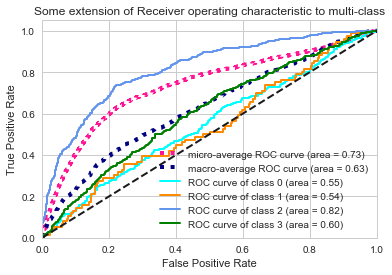

In [230]:
# Compute macro-average ROC curve and ROC area
lw = 2
# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()
